In [6]:
import numpy as np
import matplotlib.pyplot as plt
from emnist import extract_training_samples
from functools import partial

from vertices_generator import vertices
from kernel import Gaussian_kernel
from mdwsvm_ad import mdwsvm_ad
from mdwsvm import mdwsvm
from one_class_svm import one_class_svm
from hybrid import hybrid
from metric import within_class_error

In [7]:
# Load data
digits_images, digits_labels = extract_training_samples('digits')
letters_images, letters_labels = extract_training_samples('byclass')

# Get number 0, 5, 7, 8
mask_0 = (digits_labels == 0)
digits_images_0 = digits_images[mask_0]
digits_labels_0 = digits_labels[mask_0]

mask_5 = (digits_labels == 5)
digits_images_5 = digits_images[mask_5]
digits_labels_5 = digits_labels[mask_5]

mask_7 = (digits_labels == 7)
digits_images_7 = digits_images[mask_7]
digits_labels_7 = digits_labels[mask_7]

mask_8 = (digits_labels == 8)
digits_images_8 = digits_images[mask_8]
digits_labels_8 = digits_labels[mask_8]


# Get letter v, w, y
mask_vwy = (letters_labels == 57) | (letters_labels == 58) | (letters_labels == 60)
letters_images = letters_images[mask_vwy]
letters_labels = letters_labels[mask_vwy]
print(len(letters_labels))
#plt.imshow(letters_images[3,:,:])

7972


In [8]:
# Get training and testing data
X_train = np.zeros((4000,28,28))
y_train = np.zeros((4000), dtype=int)
X_test = np.zeros((8000,28,28))
y_test = np.zeros((8000), dtype=int)

# 4000 digits normalized training data 
X_train[0:1000,:,:] = digits_images_0[0:1000,:,:] / 255
X_train[1000:2000,:,:] = digits_images_5[0:1000,:,:] / 255
X_train[2000:3000,:,:] = digits_images_7[0:1000,:,:] / 255
X_train[3000:4000,:,:] = digits_images_8[0:1000,:,:] / 255
X_train = X_train.reshape(4000,784).T 
# 4000 digits training label
y_train[0:1000] = digits_labels_0[0:1000]
y_train[1000:2000] = digits_labels_5[0:1000]
y_train[2000:3000] = digits_labels_7[0:1000]
y_train[3000:4000] = digits_labels_8[0:1000]

# Get 400 digits for test X
X_test[0:100,:,:] = digits_images_0[1000:1100,:,:] / 255
X_test[100:200,:,:] = digits_images_5[1000:1100,:,:] / 255
X_test[200:300,:,:] = digits_images_7[1000:1100,:,:] / 255
X_test[300:400,:,:] = digits_images_8[1000:1100,:,:] / 255
# 400 digits testing label
y_test[0:100] = digits_labels_0[1000:1100]
y_test[100:200] = digits_labels_5[1000:1100]
y_test[200:300] = digits_labels_7[1000:1100]
y_test[300:400] = digits_labels_8[1000:1100]
# Get 7600 lowercase letters
X_test[400:8000,:,:] = letters_images[0:7600,:,:] / 255
y_test[400:8000] = letters_labels[0:7600]

# 2000 digits and 38000 letters normalized data, 0-9 are 0-9, 36-61 are a-z
X_test = X_test.reshape(8000,784).T

In [9]:
err_svm = np.zeros((6,6)) # 6 sigma value, 6 v value
sig_values = [0.1, 0.5, 1, 3, 5, 10]
v_values = [0.001, 0.01, 0.1, 0.3, 0.6, 0.9]
# True symbol for testing data
y_true = np.ones((8000), dtype=int)
y_true[400:8000] = np.full((7600), -1, dtype=int)

# Initialize
best_v = 0
best_sig = 0
best_score = -1
i = 0
j = 0
# Loop to find best v and sig value
for sig in sig_values:
    k = partial(Gaussian_kernel, sigma2 = sig)
    
    for v in v_values:
        model = one_class_svm(X_test, v = v, K = k)
        y_pred = model.predict()
        score = 1 - within_class_error(y_ture = y_true, y_pred = y_pred)
        
        # Check if the current value is the best so far
        if score > best_score:
                best_v = v
                best_sig = sig
                best_score = score
                
        # Record the current error and all the parameter values
        err_svm[i,j] = 1 - score
        j += 1
        print(score)
    # Set index
    i += 1
    j = 0


0.503157894736842
0.505328947368421
0.3426973684210526
0.18993421052631576
0.26421052631578945
0.49407894736842106
0.4826973684210526
0.48585526315789473
0.6113157894736843
0.4635526315789473
0.4486184210526316
0.45164473684210527
0.7699342105263158
0.770921052631579
0.77125
0.77
0.76875
0.77
0.2421052631578947
0.24078947368421055
0.24118421052631578
0.24092105263157904
0.24092105263157904
0.18328947368421056
0.17835526315789474
0.1796052631578947
0.18046052631578946
0.18046052631578946
0.1623684210526316
0.16546052631578956
0.22690789473684214
0.22802631578947374
0.22730263157894737
0.24414473684210525
0.35526315789473684
0.3971710526315789


In [10]:
print(best_v)
print(best_sig)
print(best_score)
print(err_svm)

0.1
1
0.77125
[[0.49684211 0.49467105 0.65730263 0.81006579 0.73578947 0.50592105]
 [0.51730263 0.51414474 0.38868421 0.53644737 0.55138158 0.54835526]
 [0.23006579 0.22907895 0.22875    0.23       0.23125    0.23      ]
 [0.75789474 0.75921053 0.75881579 0.75907895 0.75907895 0.81671053]
 [0.82164474 0.82039474 0.81953947 0.81953947 0.83763158 0.83453947]
 [0.77309211 0.77197368 0.77269737 0.75585526 0.64473684 0.60282895]]


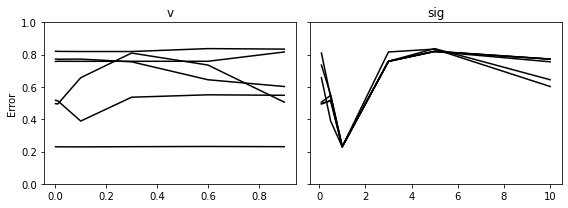

In [13]:
# Plot
fig, axs = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(8, 3))

axs[0].set_ylim([0, 1])
axs[0].set_ylabel('Error')
axs[0].set_title('v')
for i in range(6):
    axs[0].plot(v_values, err_svm[i,:], color = 'black', linestyle = '-', label = 'v')

axs[1].set_title('sig')
for i in range(6):
    axs[1].plot(sig_values, err_svm[:,i], color = 'black', linestyle = '-', label = 'sig')

plt.tight_layout()
plt.show()


In [ ]:
v = 0.1
w = vertices(5)
c = 10
k = partial(Gaussian_kernel, sigma2=1)
y_pred = hybrid(X_train, y_train, X_test, v, w, c, k)

In [ ]:
within_class_error(y_test_2, y_pred)